In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import time

from CNN import *
from DatasetLoaders import RoadSignDataset


transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

dataset = RoadSignDataset(root_dir='images', annotations_dir='annotations', transform=transform)
dataset.showClassStats()

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 4
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = CNN_32x32_Paul().to(device)
# model = CNN_300x400().to(device)

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training
# print(f"Model: {model.name}, Device: {device}, Batch Size: {batch_size}")
# time_start = time.time()
# num_epochs = 10
# total_step = len(train_loader)
# train_loss_data = np.zeros(num_epochs)
# test_loss_data = np.zeros(num_epochs)

# for epoch in range(num_epochs):
#     # Training loop
#     model.train()
#     train_loss = 0.0
#     for i, (images, labels) in enumerate(train_loader):
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     train_loss_data[epoch] = train_loss / len(train_loader)

#     # Testing loop
#     model.eval()  # Set model to evaluation mode
#     test_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in test_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item()

#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     test_loss_data[epoch] = test_loss / len(test_loader)
#     accuracy = 100 * correct / total

#     print(f'Epoch [{epoch+1}/{num_epochs}], '
#           f'Train Loss: {train_loss_data[epoch]:.4f}, '
#           f'Test Loss: {test_loss_data[epoch]:.4f}, '
#           f'Test Accuracy: {accuracy:.2f}%')
    
# dt = time.time() - time_start
# print(f'Training finished in {dt:.1f} seconds')

# # Plotting the losses
# plt.figure()
# plt.plot(np.arange(num_epochs), train_loss_data, '-x', label='Training Loss')
# plt.plot(np.arange(num_epochs), test_loss_data, '-x', label='Testing Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title(f'Training and Testing Loss over {num_epochs} Epochs')
# plt.legend()
# plt.grid()
# plt.show()


Label: 0, Count: 76
Label: 1, Count: 652
Label: 2, Count: 88
Label: 3, Count: 61


Model: CNN_32x32_Paul, Device: cuda, Batch Size: 4
Epoch [1/20], Train Loss: 1.6448, Test Loss: 0.9414, Test Accuracy: 75.00%
Epoch [2/20], Train Loss: 0.7159, Test Loss: 0.8793, Test Accuracy: 75.57%
Epoch [3/20], Train Loss: 0.7495, Test Loss: 0.8140, Test Accuracy: 72.16%
Epoch [4/20], Train Loss: 0.7005, Test Loss: 0.7172, Test Accuracy: 75.57%
Epoch [5/20], Train Loss: 0.6824, Test Loss: 0.7718, Test Accuracy: 74.43%
Epoch [6/20], Train Loss: 0.7020, Test Loss: 0.8029, Test Accuracy: 73.86%
Epoch [7/20], Train Loss: 0.6783, Test Loss: 0.7972, Test Accuracy: 73.86%
Epoch [8/20], Train Loss: 0.6422, Test Loss: 0.7454, Test Accuracy: 74.43%
Epoch [9/20], Train Loss: 0.6403, Test Loss: 0.7210, Test Accuracy: 75.00%
Epoch [10/20], Train Loss: 0.6567, Test Loss: 0.6825, Test Accuracy: 76.70%
Epoch [11/20], Train Loss: 0.6380, Test Loss: 0.7290, Test Accuracy: 74.43%
Epoch [12/20], Train Loss: 0.6218, Test Loss: 0.6953, Test Accuracy: 75.57%
Epoch [13/20], Train Loss: 0.6155, Test Loss: 

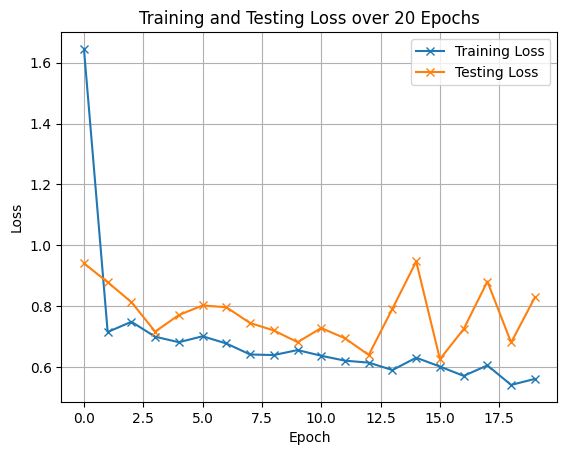

In [2]:
from torch.optim import lr_scheduler

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.ASGD(model.parameters(), lr=0.05)
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)
# Training
print(f"Model: {model.name}, Device: {device}, Batch Size: {batch_size}")
time_start = time.time()
num_epochs = 20
total_step = len(train_loader)
train_loss_data = np.zeros(num_epochs)
test_loss_data = np.zeros(num_epochs)

for epoch in range(num_epochs):
    # Training loop
    model.train()
    train_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # scheduler.step(loss)

        train_loss += loss.item()

    train_loss_data[epoch] = train_loss / len(train_loader)

    # Testing loop
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss_data[epoch] = test_loss / len(test_loader)
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss_data[epoch]:.4f}, '
          f'Test Loss: {test_loss_data[epoch]:.4f}, '
          f'Test Accuracy: {accuracy:.2f}%')
    
dt = time.time() - time_start
print(f'Training finished in {dt:.1f} seconds')

# Plotting the losses
plt.figure()
plt.plot(np.arange(num_epochs), train_loss_data, '-x', label='Training Loss')
plt.plot(np.arange(num_epochs), test_loss_data, '-x', label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training and Testing Loss over {num_epochs} Epochs')
plt.legend()
plt.grid()
plt.show()


results of some tests:

**Model 1: LR 0.1, Cross Entropy Loss, SGD**

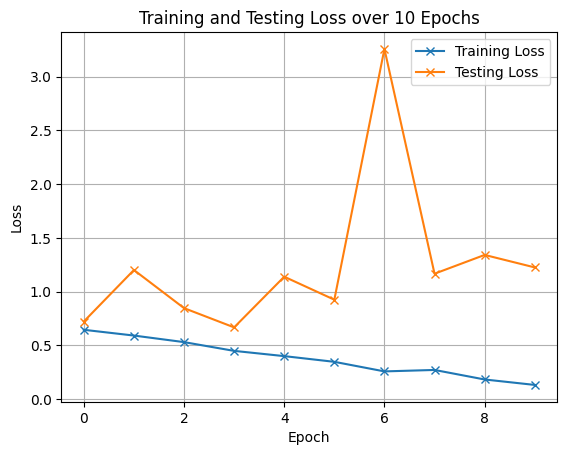


**Model 2: LR 0.05, Cross Entropy Loss, ASGD**

Epoch [1/10], Train Loss: 1.5715, Test Loss: 1.2289, Test Accuracy: 46.59%
Epoch [2/10], Train Loss: 0.7532, Test Loss: 0.6656, Test Accuracy: 77.84%
Epoch [3/10], Train Loss: 0.7007, Test Loss: 0.5906, Test Accuracy: 78.98%
Epoch [4/10], Train Loss: 0.6760, Test Loss: 0.6046, Test Accuracy: 82.95%
Epoch [5/10], Train Loss: 0.6071, Test Loss: 0.5874, Test Accuracy: 82.95%
Epoch [6/10], Train Loss: 0.5951, Test Loss: 0.6998, Test Accuracy: 79.55%
Epoch [7/10], Train Loss: 0.5590, Test Loss: 0.6152, Test Accuracy: 82.39%
Epoch [8/10], Train Loss: 0.5485, Test Loss: 1.2222, Test Accuracy: 51.70%
Epoch [9/10], Train Loss: 0.5153, Test Loss: 0.9548, Test Accuracy: 67.61%
Epoch [10/10], Train Loss: 0.4167, Test Loss: 0.7151, Test Accuracy: 79.55%

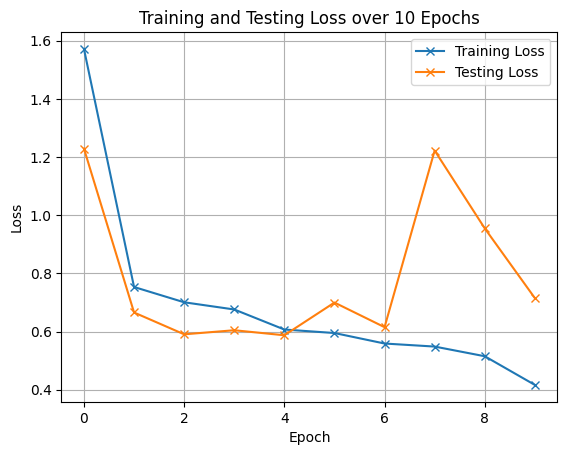